Importing Libraries

In [1]:
# import the necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Importing Dataset

In [2]:
# Load the dataset from the csv file using pandas
df = pd.read_csv("apple_stock.csv")

Understanding the Data

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-13,77.910004,79.267502,77.787498,79.239998,78.561531,121532000
1,2020-01-14,79.175003,79.392502,78.042503,78.169998,77.500702,161954400
2,2020-01-15,77.962502,78.875000,77.387497,77.834999,77.168564,121923600
3,2020-01-16,78.397499,78.925003,78.022499,78.809998,78.135223,108829200
4,2020-01-17,79.067497,79.684998,78.750000,79.682503,79.000244,137816400


Describing the Data

In [4]:
print(df.shape)
df.describe()

(253, 7)


,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,96.781917,98.195860,95.381719,96.841106,96.555759,1.487647e+08
std,22.451754,22.533056,22.030659,22.259124,22.403894,7.610504e+07
min,57.020000,57.125000,53.152500,56.092499,55.744217,2.256430e+07
25%,78.292503,79.267502,77.625000,78.262497,77.776558,1.005660e+08
50%,94.187500,95.375000,93.712502,95.040001,94.705559,1.335680e+08
75%,116.970001,118.709999,115.260002,116.589996,116.399178,1.822744e+08
max,138.050003,138.789993,134.339996,136.690002,136.690002,4.268848e+08


In [5]:
# Display summary information using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [6]:
# check for the null values 
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

EDA Exploratory Data Analysis

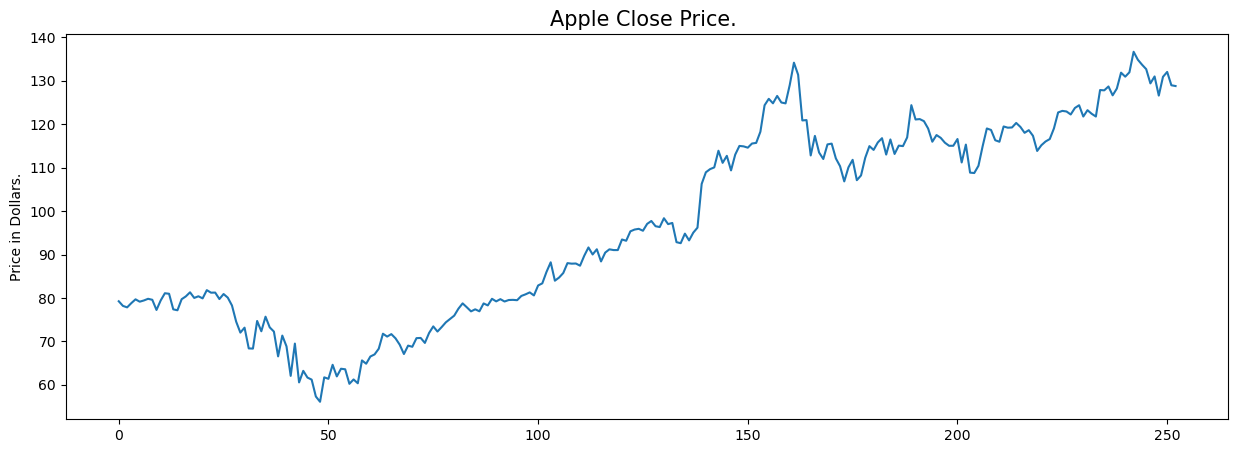

In [7]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Apple Close Price. ', fontsize = 15)
plt.ylabel('Price in Dollars.')
plt.show()

In [8]:
df[df['Close'] == df['Adj Close']].shape

(45, 7)

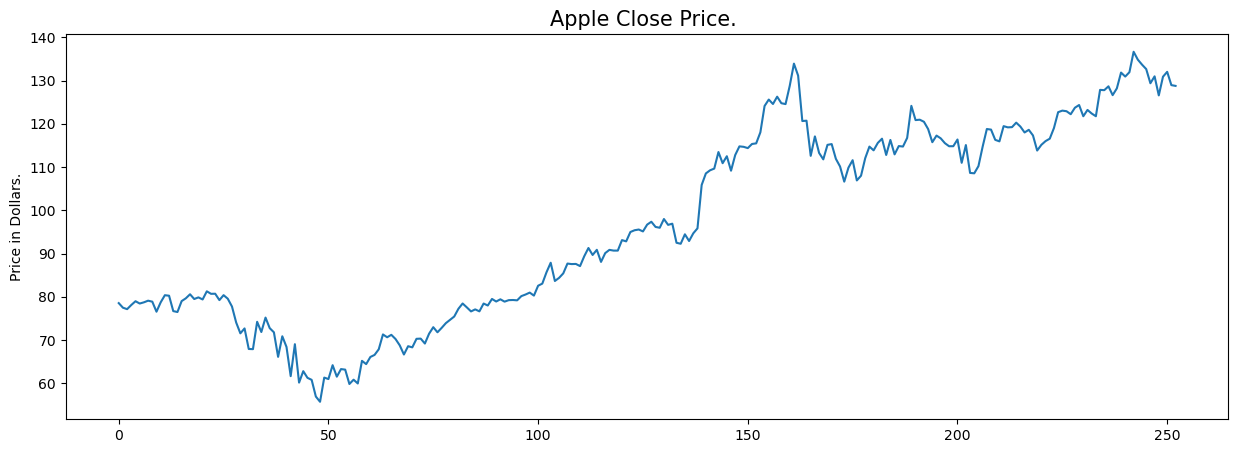

In [9]:
plt.figure(figsize=(15,5))
plt.plot(df['Adj Close'])
plt.title('Apple Close Price. ', fontsize = 15)
plt.ylabel('Price in Dollars.')
plt.show()

C:\Users\sebin\AppData\Local\Temp\ipykernel_22676\4275796393.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


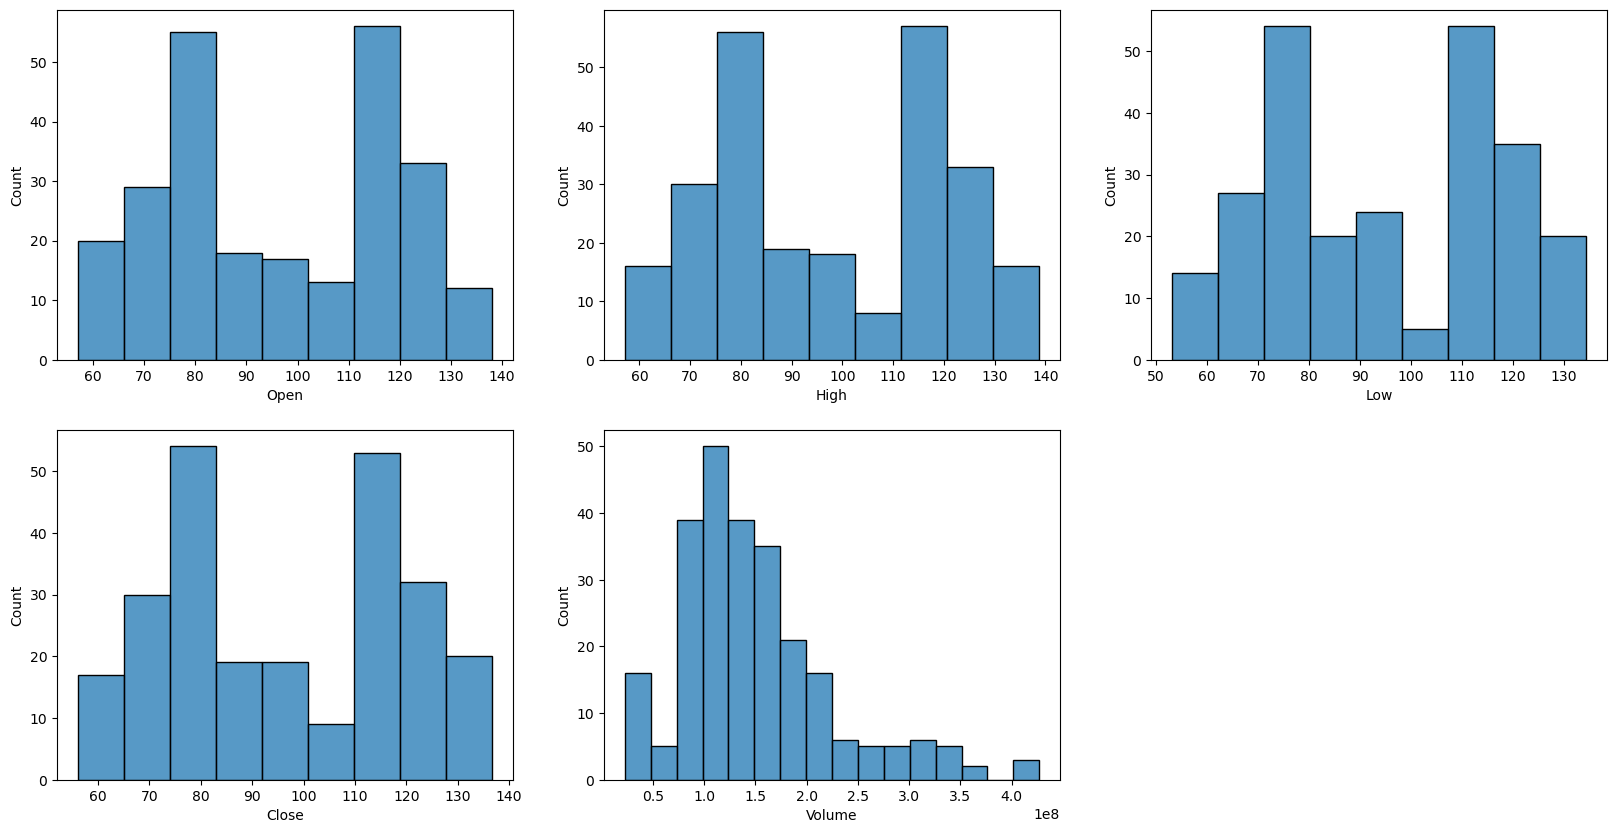

In [10]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.histplot(df[col])
plt.show()



In [11]:
splitted = df['Date'].str.split('-', expand=True)
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2020-01-13,77.910004,79.267502,77.787498,79.239998,78.561531,121532000,13,1,2020
1,2020-01-14,79.175003,79.392502,78.042503,78.169998,77.500702,161954400,14,1,2020
2,2020-01-15,77.962502,78.875000,77.387497,77.834999,77.168564,121923600,15,1,2020
3,2020-01-16,78.397499,78.925003,78.022499,78.809998,78.135223,108829200,16,1,2020
4,2020-01-17,79.067497,79.684998,78.750000,79.682503,79.000244,137816400,17,1,2020


In [12]:
df['is_quarter_end'] = np.where(df['month']%3 == 0,1,0)
df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
248,2021-01-06,127.720001,131.050003,126.379997,126.599998,126.599998,155088000,6,1,2021,0
249,2021-01-07,128.360001,131.630005,127.860001,130.919998,130.919998,109578200,7,1,2021,0
250,2021-01-08,132.429993,132.630005,130.229996,132.050003,132.050003,105158200,8,1,2021,0
251,2021-01-11,129.190002,130.169998,128.500000,128.979996,128.979996,100620900,11,1,2021,0
252,2021-01-12,128.500000,129.690002,126.860001,128.800003,128.800003,91722800,12,1,2021,0


C:\Users\sebin\AppData\Local\Temp\ipykernel_22676\1038270307.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly =df.groupby('year').mean()


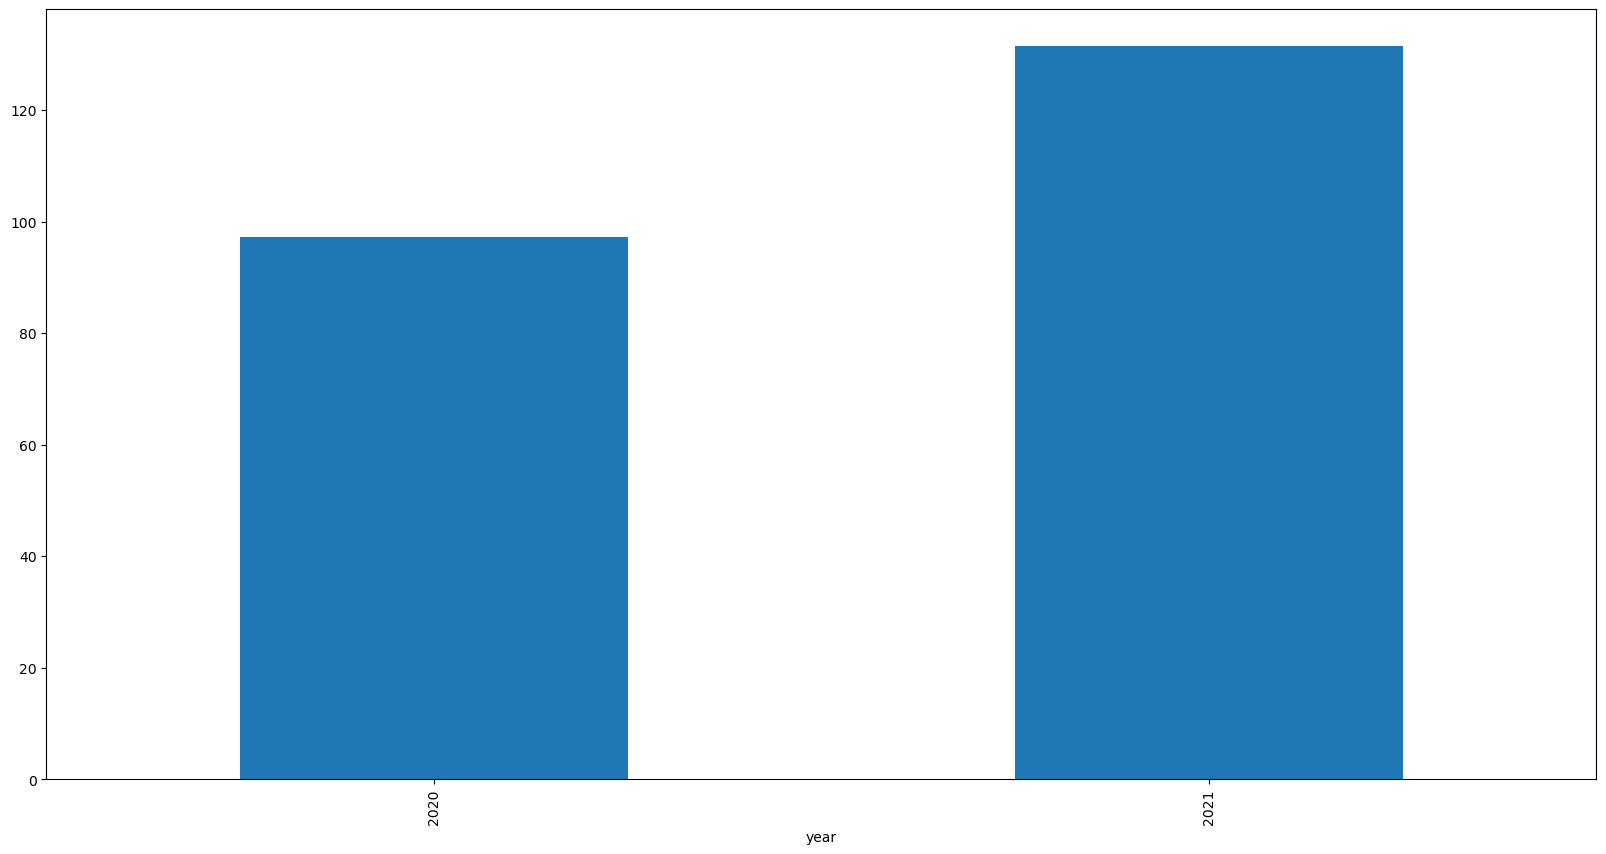

In [13]:
yearly =df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  yearly[col].plot.bar()
plt.show()

In [14]:
df.groupby('is_quarter_end').mean()

C:\Users\sebin\AppData\Local\Temp\ipykernel_22676\2310314654.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Adj Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,95.903449,97.172922,94.735512,96.008449,95.692944,1.400707e+08,16.012048,6.054217,2020.042169
1,98.458075,100.147672,96.614712,98.429856,98.202050,1.653531e+08,15.551724,7.482759,2020.000000


In [15]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

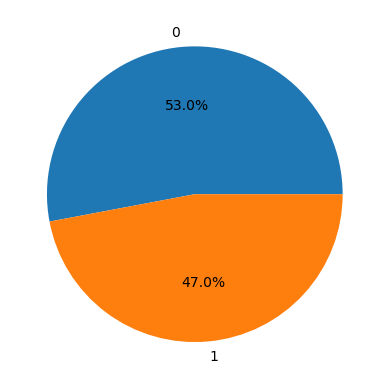

In [16]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

heatmap

C:\Users\sebin\AppData\Local\Temp\ipykernel_22676\1603719418.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)


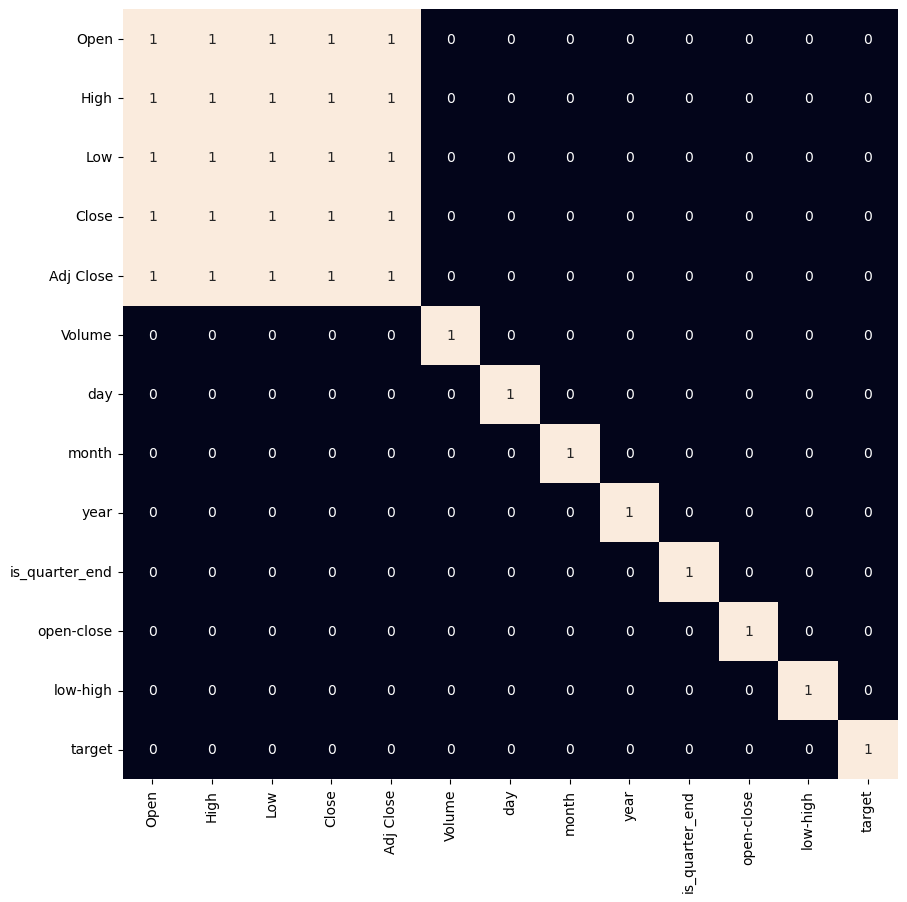

In [17]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

Data Splitting and Normalization

In [19]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
scaler = StandardScaler()
features = scaler.fit_transform(features)
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(227, 3) (26, 3)


LogisticRegression

In [20]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
for i in range(3):
  models[i].fit(X_train, Y_train)
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5605919003115265
Validation Accuracy :  0.36904761904761907

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.438006230529595
Validation Accuracy :  0.44047619047619047

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training